In [1]:
# YellowstoneWolves_MS.csv
# YellowstoneWolves_PI.csv
# YellowstoneWolves_U.csv

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import warnings # supress warnings
warnings.filterwarnings('ignore')


In [4]:
# import Housing.csv
df = pd.read_csv('YellowstoneWolves_U.csv')
df

,sort,Name,Sex,Color,Birth Year,Birth Month/Day,Birth Pack,Mother,Father,Birth Location,...,Last seen,Death/Last Month/Day,Death Cause,Death/Last Location,Alt name,Translocated,on 2023 Wolf Chart?,Official Tree?,Book?,notes
0,2.0,2,M,b,1994,April,Crystal Creek,5F,4M,"Alberta, Canada",...,NaN,December,Wolf,"Blacktail Deer Plateau, YNP",NaN,Petite Lake,NaN,Yes,Yes,NaN
1,3.0,3,M,b,1994,April,Crystal Creek,5F,4M,"Alberta, Canada",...,NaN,February 5,Legally Shot,"Emigrant, MT",NaN,Petite Lake,NaN,Yes,Yes,NaN
2,4.0,4,M,b,1991?,?,Crystal Creek,?,?,"Alberta, Canada",...,NaN,May 21,Wolf (Druid Peak),"Soda Butte Canyon, YNP",NaN,Petite Lake,NaN,Yes,Yes,NaN
3,5.0,5,F,g,1991?,?,Crystal Creek,?,?,"Alberta, Canada",...,2000,Unknown,NaN,Unknown,NaN,Petite Lake,NaN,Yes,Yes,NaN
4,6.0,6,M,b,1994,April,Crystal Creek,5F's sister?,4M,"Alberta, Canada",...,NaN,August 25,Natural (Elk),"Pelican Valley, YNP",NaN,Petite Lake,NaN,Yes,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [316]:
df.head()

,sort,Name,Sex,Color,Birth Year,Birth Month/Day,Birth Pack,Mother,Father,Birth Location,...,Last seen,Death/Last Month/Day,Death Cause,Death/Last Location,Alt name,Translocated,on 2023 Wolf Chart?,Official Tree?,Book?,notes
0,2,2,M,b,1994,April,Crystal Creek,5F,4M,"Alberta, Canada",...,NaN,December,Wolf,"Blacktail Deer Plateau, YNP",NaN,Petite Lake,NaN,Yes,Yes,NaN
1,3,3,M,b,1994,April,Crystal Creek,5F,4M,"Alberta, Canada",...,NaN,February 5,Legally Shot,"Emigrant, MT",NaN,Petite Lake,NaN,Yes,Yes,NaN
2,4,4,M,b,1991?,?,Crystal Creek,?,?,"Alberta, Canada",...,NaN,May 21,Wolf (Druid Peak),"Soda Butte Canyon, YNP",NaN,Petite Lake,NaN,Yes,Yes,NaN
3,5,5,F,g,1991?,?,Crystal Creek,?,?,"Alberta, Canada",...,2000,Unknown,NaN,Unknown,NaN,Petite Lake,NaN,Yes,Yes,NaN
4,6,6,M,b,1994,April,Crystal Creek,5F's sister?,4M,"Alberta, Canada",...,NaN,August 25,Natural (Elk),"Pelican Valley, YNP",NaN,Petite Lake,NaN,Yes,Yes,NaN


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sort                  1396 non-null   int64 
 1   Name                  1396 non-null   object
 2   Sex                   1396 non-null   object
 3   Color                 1396 non-null   object
 4   Birth Year            1396 non-null   object
 5   Birth Month/Day       1396 non-null   object
 6   Birth Pack            1383 non-null   object
 7   Mother                1396 non-null   object
 8   Father                1396 non-null   object
 9   Birth Location        1396 non-null   object
 10  Current/Death Pack    1255 non-null   object
 11  Previous Packs        1396 non-null   object
 12  Death Year            505 non-null    object
 13  Last seen             949 non-null    object
 14  Death/Last Month/Day  1396 non-null   object
 15  Death Cause           505 non-null    

In [318]:
# displaying the datatypes
display(df.dtypes)

sort                     int64
Name                    object
Sex                     object
Color                   object
Birth Year              object
Birth Month/Day         object
Birth Pack              object
Mother                  object
Father                  object
Birth Location          object
Current/Death Pack      object
Previous Packs          object
Death Year              object
Last seen               object
Death/Last Month/Day    object
Death Cause             object
Death/Last Location     object
Alt name                object
Translocated            object
on 2023 Wolf Chart?     object
Official Tree?          object
Book?                   object
notes                   object
dtype: object

In [319]:
df = df.fillna(0) #fill in missing value however we need to find where those are

In [320]:
df.drop(['Book?', 'notes', 'Official Tree?', 'on 2023 Wolf Chart?'], axis=1, inplace=True)

In [5]:
df['Birth Month/Day'].replace('?', ' ', inplace=True)
df['Birth Month/Day'].replace('~', ' ', inplace=True)

In [6]:
df = df[:1397]

In [7]:
df.drop(['Birth Month/Day'], axis=1, inplace=True)

In [8]:
# function to just have the entries be strings. N is for None
Sex = []

for i in df["Sex"]:
    value = str(i)
    if(value == "M" or value == "F"):
        Sex.append(value)
    else:
        Sex.append("N")
        
df["Sex"] = Sex 

In [9]:
# function to numerical encode the entries. 1 = M, 2 = F, 3 = Unknown.
SexNum = []

for i in df["Sex"]:
    value = str(i)
    if(value == "M"):
        SexNum.append(1)
    elif(value == "F"):
        SexNum.append(2)
    else:
        SexNum.append(3)

df["Sex"] = SexNum

In [10]:
# function to clean up birth years to be all intergers
# function to clean up birth years to be all intergers
byear = []

for j in df["Birth Year"]:
    value = str(j)
    if(len(value) > 4):
        value = value[:4]
        byear.append(int(value))
    elif(value == "?"):
        byear.append(0)
    else:
        byear.append(int(value))
    
df["Birth Year"] = byear

ValueError: invalid literal for int() with base 10: 'nan'

In [11]:
def pack(str):
    value = ""
    if(str.find("None") != -1 ):
        value = 0
    elif(str.find("Crystal Creek") != -1):
        value = 1
    elif(str.find("Rose Creek") != -1):
        value = 2
    elif(str.find("Soda Butte") != -1):
        value = 3
    elif(str.find("Nez Perce") != -1):
        value = 4
    elif(str.find("Chief Joseph") != -1):
        value = 5
    elif(str.find("Lone Star") != -1):
        value = 6
    elif(str.find("Druid Peak") != -1):
        value = 7
    elif(str.find("Leopold") != -1):
        value = 8
    elif(str.find("Sawtooth") != -1):
        value = 9
    elif(str.find("Thorofare") != -1):
        value = 10
    elif(str.find("Washakie") != -1):
        value = 11
    elif(str.find("Sheep Mountain") != -1):
        value = 12
    elif(str.find("Teton") != -1):
        value = 13
    elif(str.find("Gros Ventre") != -1):
        value = 14
    elif(str.find("Sunlight Basin") != -1):
        value = 15
    elif(str.find("Sentinel") != -1):
        value = 16
    elif(str.find("Freezeout") != -1):
        value = 17
    elif(str.find("Absaroka") != -1):
        value = 18
    elif(str.find("Taylor Peak") != -1):
        value = 19
    elif(str.find("Yellowstone Delta") != -1):
        value = 20
    elif(str.find("Mollie's") != -1):
        value = 21
    elif(str.find("Graybull") != -1):
        value = 22
    elif(str.find("Lone Bear") != -1):
        value = 23
    elif(str.find("Cougar Creek") != -1):
        value = 24
    elif(str.find("Swan Lake") != -1):
        value = 25
    elif(str.find("Agate Creek") != -1):
        value = 26
    elif(str.find("Geode Creek") != -1):
        value = 27
    elif(str.find("Slough Creek") != -1):
        value = 28
    elif(str.find("Bechlerk") != -1):
        value = 29
    elif(str.find("Phantom Lake") != -1):
        value = 30
    elif(str.find("Gibbon Meadows") != -1):
        value = 31
    elif(str.find("Biscuit Basin") != -1):
        value = 32
    elif(str.find("Oxbow Creek") != -1):
        value = 33
    elif(str.find("Hayden Valley") != -1):
        value = 34
    elif(str.find("Mount Everts") != -1):
        value = 35
    elif(str.find("Blacktail") != -1):
        value = 36
    elif(str.find("Silver") != -1):
        value = 37
    elif(str.find("South Forks") != -1):
        value = 38
    elif(str.find("Lamar Canyon") != -1):
        value = 39
    elif(str.find("Mary Mountain") != -1):
        value = 40
    elif(str.find("Quadrant Mountain") != -1):
        value = 41
    elif(str.find("Junction Butte") != -1):
        value = 42
    elif(str.find("8-Mile") != -1):
        value = 43
    elif(str.find("Pahaska") != -1):
        value = 44
    elif(str.find("Snake River") != -1):
        value = 45
    elif(str.find("Prospect Peak") != -1):
        value = 46
    elif(str.find("Wapiti Lake") != -1):
        value = 47
    elif(str.find("Carnelian Creek") != -1):
        value = 48
    elif(str.find("Beartooth") != -1):
        value = 49
    elif(str.find("Chief Joseph") != -1):
        value = 50
    elif(str.find("Hoodoo") != -1):
        value = 51
    elif(str.find("Shrimp Lake") != -1):
        value = 52
    elif(str.find("Gros Ventre") != -1):
        value = 53
    elif(str.find("Specimen Ridge") != -1):
        value = 54
    elif(str.find("Hellroaring Creek") != -1):
        value = 55
    elif(str.find("Madison") != -1):
        value = 56
    elif(str.find("Mary Mountain") != -1):
        value = 57
    elif(str.find("Canyon") != -1):
        value = 58
    elif(str.find("Heart Lake") != -1):
        value = 59
    elif(str.find("Rescue Creek") != -1):
        value = 60
    else:
        value = 0
    return value

In [12]:
bpacks = []
for value in df["Birth Pack"]:
    value = str(value)
    newPack = pack(value)
    bpacks.append(newPack)
      
df["Birth Pack"] = bpacks  

In [13]:
cdpacks = []
for value in df["Current/Death Pack"]:
    value = str(value)
    newPack = pack(value)
    cdpacks.append(newPack)
      
df["Current/Death Pack"] = bpacks  

In [14]:
ppacks = []
for value in df["Previous Packs"]:
    value = str(value)
    newPack = pack(value)
    ppacks.append(newPack)
      
df["Previous Packs"] = ppacks  

In [15]:
df.drop(['Mother', 'Father', "sort", "Name" ], axis=1, inplace=True)

In [16]:
# function to just have the entries be strings. N is for None
color = []

for i in df["Color"]:
    value = str(i)
    if(value == "b"):
        color.append(1)
    elif(value == "g"):
        color.append(2)
    else:
        color.append(0)
        
df["Color"] = color 

In [17]:
# function to clean up death years to be all intergers
dyear = []

for j in df["Death Year"]:
    value = str(j)
    if(value == "Living" or value == "Livi" ):
        dyear.append(0)
    elif(len(value) > 4):
        value = value[:4]
        dyear.append(int(value))
    elif(value == "0"):
        dyear.append(0)
    elif(value == "?"):
        dyear.append(0)
    else:
        dyear.append(int(value))
    
df["Death Year"] = dyear
#df.drop(df[(df['Death Year'] == 0)].index,inplace=True)

ValueError: invalid literal for int() with base 10: 'nan'

In [18]:
# function to clean up last seen to be all intergers
last = []

for j in df["Last seen"]:
    value = str(j)
    if(value == "Living" or value == "Livi" ):
        last.append(2024)
    elif(len(value) > 4):
        value = value[:4]
        last.append(int(value))
    elif(value == "N/A" or value == "?"):
        last.append(0)
    else:
        last.append(int(value))
    
df["Last seen"] = last

ValueError: invalid literal for int() with base 10: 'nan'

In [335]:
df

,Sex,Color,Birth Year,Birth Pack,Birth Location,Current/Death Pack,Previous Packs,Death Year,Last seen,Death/Last Month/Day,Death Cause,Death/Last Location,Alt name,Translocated
0,1,1,1994,1,"Alberta, Canada",1,0,2002,0,December,Wolf,"Blacktail Deer Plateau, YNP",0,Petite Lake
1,1,1,1994,1,"Alberta, Canada",1,0,1996,0,February 5,Legally Shot,"Emigrant, MT",0,Petite Lake
2,1,1,1991,1,"Alberta, Canada",1,0,1996,0,May 21,Wolf (Druid Peak),"Soda Butte Canyon, YNP",0,Petite Lake
3,2,2,1991,1,"Alberta, Canada",1,0,0,2000,Unknown,0,Unknown,0,Petite Lake
4,1,1,1994,1,"Alberta, Canada",1,0,1998,0,August 25,Natural (Elk),"Pelican Valley, YNP",0,Petite Lake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,3,1,2021,60,North Central Yellowstone National Park,60,0,0,2021,unknown,0,unknown,Black Pup Rescue Creek,0
1392,3,1,2021,60,North Central Yellowstone National Park,60,0,0,2021,unknown,0,unknown,Black Pup Rescue Creek,0
1393,3,1,2021,60,North Central Yellowstone National Park,60,0,0,2021,unknown,0,unknown,Black Pup Rescue Creek,0
1394,3,2,2021,60,North Central Yellowstone National Park,60,0,0,2021,unknown,0,unknown,Gray Pup Rescue Creek,0


In [66]:
'''Using birth year and death year (or last year seen, if no death year confirmed), 
creating a dict for each wolf and the years they were alive. That dict is then used
to create a list of the populations for each year'''
birth_arr = df.iloc[:,2:3].to_numpy()
death_arr = df.iloc[:,7:8].to_numpy()
last_arr = df.iloc[:,8:9].to_numpy()
#if no death year given, use last year seen
for i in range(len(death_arr)):
    if int(death_arr[i]) == 0:
        death_arr[i] = last_arr[i]
wolves = {}
age_arr = []
#for each wolf, assign it the range of years it was alive
for i in range(1396):
    age = death_arr[i] - birth_arr[i]
    age_arr.append(int(age))
    yr_arr = []
    for j in range(int(age)+1):
        yr_arr.append(int(birth_arr[i])+j)
    print(i,": ",yr_arr) #print the dictionary in readable format
    wolves[i] = [yr_arr]
#create the list of years
years = []
for i in range(1991,2024):
    years.append(i)
#based on how many wolves were alive in each year, create the list of populations
population = []
for i in years:
    counter = 0
    for j in wolves:
        if i in wolves[j][0]:
            counter= counter+1
    population.append(counter)
print(age_arr)


0 :  [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002]
1 :  [1994, 1995, 1996]
2 :  [1994, 1995, 1996, 1997, 1998]
3 :  [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002]
4 :  [1994, 1995, 1996, 1997, 1998, 1999, 2000]
5 :  [1995, 1996, 1997, 1998, 1999, 2000]
6 :  [1995, 1996, 1997]
7 :  [1995, 1996, 1997]
8 :  [1995, 1996]
9 :  [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004]
10 :  [1995]
11 :  [1995, 1996, 1997, 1998, 1999, 2000]
12 :  [1995, 1996, 1997, 1998]
13 :  [1995, 1996, 1997, 1998]
14 :  [1995, 1996, 1997]
15 :  [1995, 1996, 1997, 1998, 1999, 2000, 2001]
16 :  [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001]
17 :  [1995, 1996, 1997]
18 :  [1995, 1996, 1997, 1998, 1999, 2000]
19 :  [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004]
20 :  [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004]
21 :  [1996, 1997, 1998, 1999]
22 :  [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005]
23 :  [1996]
24 :  [1996, 1997, 1998, 1999]
25 :  [

IndexError: index 408 is out of bounds for axis 0 with size 408

In [337]:
d1 = df["Sex"]
d2 = df["Birth Pack"]
d3 = df["Current/Death Pack"]
dx = []
dy = age_arr
for i in range(1396):
    entry = []
    entry.append(d1[i])
    entry.append(d2[i])
    entry.append(d3[i])
    dx.append(entry)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dx, dy, test_size = 0.05)

# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(dx, dy)

DecisionTreeRegressor(random_state=0)

In [338]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y):
    #create a dictionary of all values we want to test
    param_grid = {'max_depth': np.arange(3, 20)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

tree_para = {'criterion':['gini','entropy','absolute error','squared error'],'max_depth':np.arange(5,20)}
new_reg = GridSearchCV(DecisionTreeClassifier(), tree_para)
new_reg.fit(dx, dy)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'absolute error',
                                       'squared error'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [339]:
#the scores of the original model without hyperparameter tuning
y_pred = regressor.predict(X_test)

data1 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
data1

#model scores 
train_score=regressor.score(X_train, y_train)
print("train score:", train_score)

test_score=regressor.score(X_test, y_test)
print("test score:",test_score)

train score: 0.5857069140922402
test score: 0.58420698004314


In [340]:
#the scores of the new model
y_pred = new_reg.predict(X_test)

data2 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
data2

#model scores 
train_score=new_reg.score(X_train, y_train)
print("train score:", train_score)

test_score=new_reg.score(X_test, y_test)
print("test score:",test_score)

train score: 0.6395173453996983
test score: 0.7


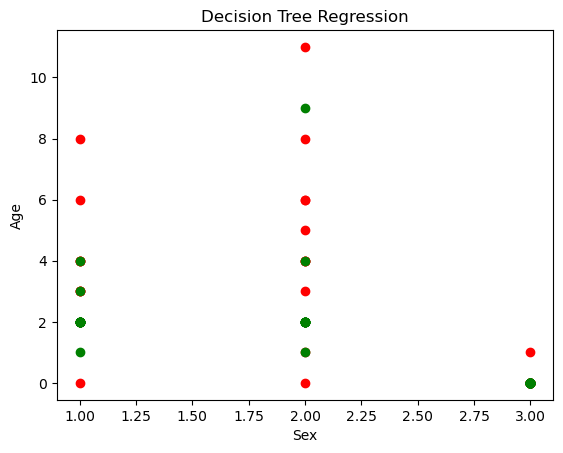

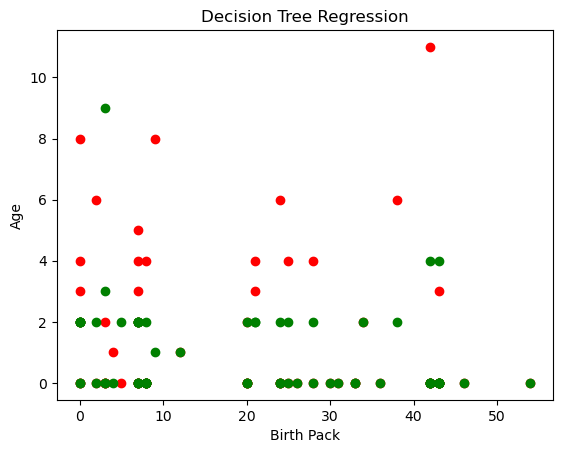

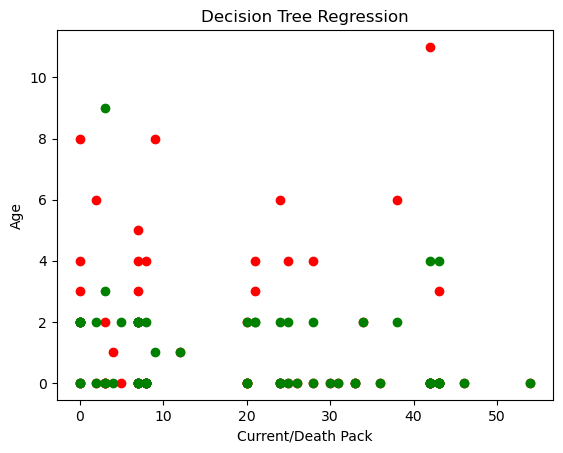

In [341]:
# Visualising the Decision Tree Regression Results 
X_grid = np.arange(0, 15, 1)
X_grid = X_grid.reshape((len(X_grid), 1))
sex_test = []
for i in range(len(X_test)):
    sex_test.append(X_test[i][0])
plt.scatter(sex_test, y_test, color = 'red')
plt.scatter(sex_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

birth_test = []
for i in range(len(X_test)):
    birth_test.append(X_test[i][1])
plt.scatter(birth_test, y_test, color = 'red')
plt.scatter(birth_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Birth Pack')
plt.ylabel('Age')
plt.show()

last_test = []
for i in range(len(X_test)):
    last_test.append(X_test[i][2])
plt.scatter(last_test, y_test, color = 'red')
plt.scatter(last_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Current/Death Pack')
plt.ylabel('Age')
plt.show()


In [3]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(new_reg.best_estimator_, out_file ='tree.dot', 
               feature_names =['Sex','Birth Pack','Current/Death Pack'])

NameError: name 'new_reg' is not defined

In [23]:
print(df[['Birth Year', 'Death Year']])

      Birth Year  Death Year
0         1994.0      2002.0
1         1994.0      1996.0
2            NaN      1996.0
3            NaN         NaN
4         1994.0      1998.0
...          ...         ...
1392      2021.0         NaN
1393      2021.0         NaN
1394      2021.0         NaN
1395      2023.0         NaN
1396         NaN         NaN

[1397 rows x 2 columns]


In [26]:


# Print to confirm the conversion
print(df[['Birth Year', 'Death Year']].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Birth Year  1255 non-null   float64
 1   Death Year  450 non-null    float64
dtypes: float64(2)
memory usage: 22.0 KB
None


In [40]:
df['Birth Year'] = pd.to_numeric(df['Birth Year'], errors='coerce')
df['Death Year'] = pd.to_numeric(df['Death Year'], errors='coerce')

# Check for and handle NaNs
df.dropna(subset=['Birth Year', 'Death Year'], inplace=True)

# Convert to integer if needed
df['Birth Year'] = df['Birth Year'].astype(int)
df['Death Year'] = df['Death Year'].astype(int)

# Display data types and a few entries to ensure conversion was successful
print(df[['Birth Year', 'Death Year']].info())
print(df[['Birth Year', 'Death Year']].head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 0 to 1377
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Birth Year  408 non-null    int64
 1   Death Year  408 non-null    int64
dtypes: int64(2)
memory usage: 9.6 KB
None
   Birth Year  Death Year
0        1994        2002
1        1994        1996
4        1994        1998
5        1994        2002
6        1994        2000


In [41]:
# Calculate correlation matrix
corr_matrix = df[['Birth Year', 'Death Year']].corr()
print(corr_matrix)



            Birth Year  Death Year
Birth Year    1.000000    0.999846
Death Year    0.999846    1.000000


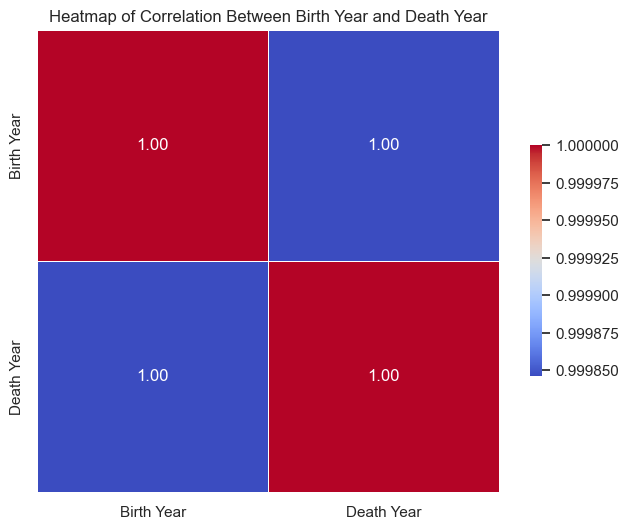

In [42]:
# Set the aesthetic style of the plots
sns.set(style="white")

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': .5}, square=True, linewidths=.5)

# Adding title
plt.title('Heatmap of Correlation Between Birth Year and Death Year')

# Show the plot
plt.show()

In [54]:
birth_pack_counts = df['Birth Pack'].value_counts()

print(birth_pack_counts)

7     65
43    35
42    31
21    25
27    24
26    22
8     21
2     20
4     19
5     13
0     13
33    10
28     9
47     9
9      8
24     8
12     7
3      7
25     6
36     6
39     6
1      6
35     5
31     5
20     4
55     3
46     3
40     2
41     2
58     2
32     2
11     2
10     2
30     2
37     1
14     1
48     1
34     1
Name: Birth Pack, dtype: int64


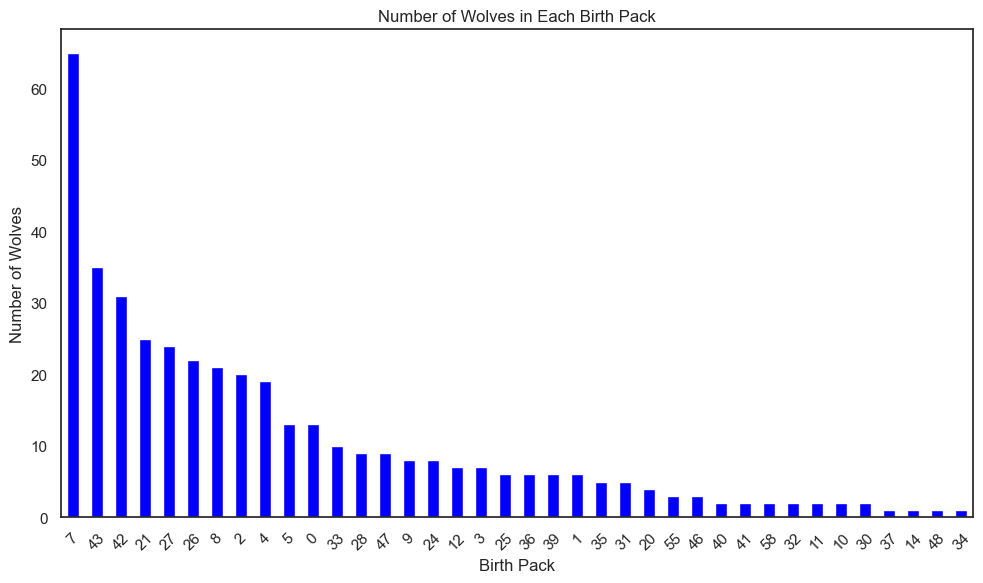

In [57]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
birth_pack_counts.plot(kind='bar', color='Blue')
plt.title('Number of Wolves in Each Birth Pack')
plt.xlabel('Birth Pack')
plt.ylabel('Number of Wolves')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Sex` for parameter `x`

<Figure size 1000x800 with 0 Axes>

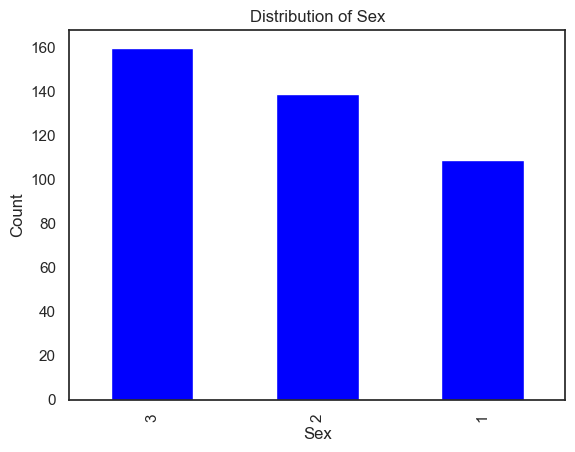

In [62]:
# Plot bar graph for 'Sex'
sex_counts = df['Sex'].value_counts()
sex_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

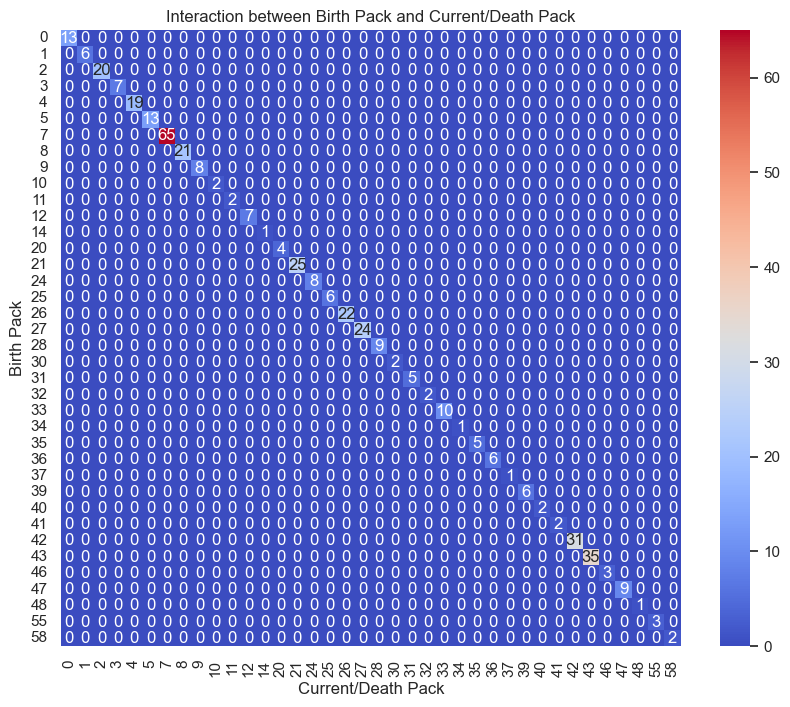

In [63]:
crosstab = pd.crosstab(df['Birth Pack'], df['Current/Death Pack'])

# Plot heat map
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, cmap='coolwarm')
plt.title('Interaction between Birth Pack and Current/Death Pack')
plt.xlabel('Current/Death Pack')
plt.ylabel('Birth Pack')
plt.show()

In [80]:
crosstab_result = pd.crosstab(df['Sex'], df['Birth Year'])

print(crosstab_result)
plt.show()

Birth Year  1970
Sex             
1            109
2            139
3            160


In [83]:
crosstab_extended = pd.crosstab(index=[df['Sex'], df['Birth Year']], columns=df['Current/Death Pack'])

print(crosstab_extended)

Current/Death Pack  0   1   2   3   4   5   7   8   9   10  ...  39  40  41  \
Sex Birth Year                                              ...               
1   1970             5   4   9   4   9   7  13   7   3   0  ...   1   0   0   
2   1970             2   2   9   3  10   4  17  10   5   1  ...   2   2   2   
3   1970             6   0   2   0   0   2  35   4   0   1  ...   3   0   0   

Current/Death Pack  42  43  46  47  48  55  58  
Sex Birth Year                                  
1   1970             2   7   0   5   0   0   0  
2   1970             6   8   0   4   0   0   1  
3   1970            23  20   3   0   1   3   1  

[3 rows x 38 columns]
